In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(147)

In [42]:
k = 10  # Number of clusters
alpha = np.random.choice(25, size=k)  # Dirichlet parameter (symmetric prior)
pi = np.random.dirichlet(alpha)  # Mixture weights
n = 100  # Number of data points
cluster_assignments = np.random.choice(k, size=n, p=pi)  # Cluster indices
# Define means and covariances for each cluster
means = np.array([[0,0], [4,-10], [6,-2], [-4,12], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]])
covariancesk = np.array([.4*np.eye(2) for _ in range(4)])
covariancesrest = np.array(20*[np.eye(2) for _ in range(6)])
covariances = np.concatenate((covariancesk, covariancesrest), axis=0)
# Generate data points from assigned clusters
X = np.array([np.random.multivariate_normal(means[g], covariances[g]) for g in cluster_assignments])
Z = cluster_assignments

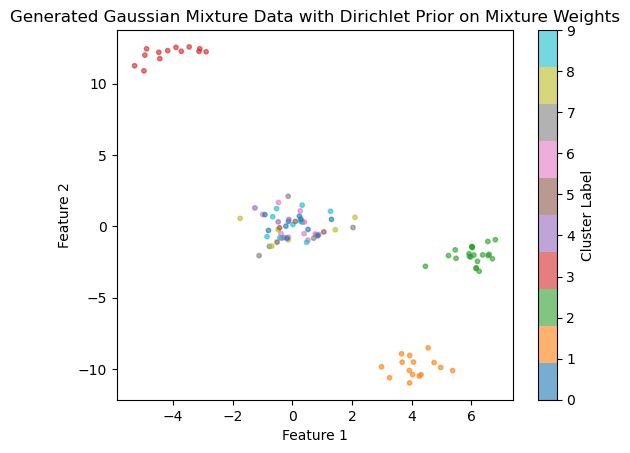

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_79994/1315606259.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='tab10', alpha=0.6, s=10)


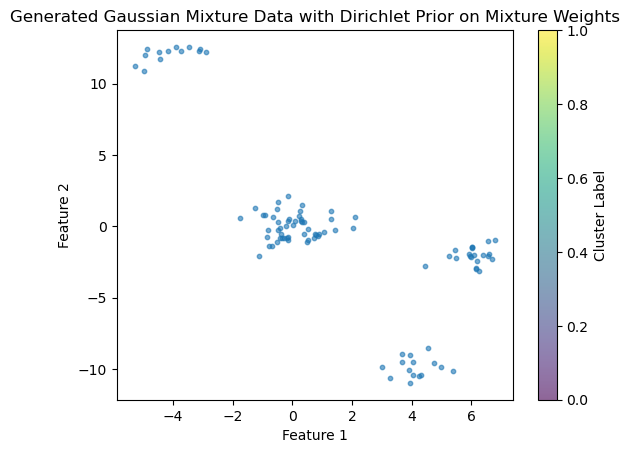

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='tab10', alpha=0.6, s=10)
plt.title("Generated Gaussian Mixture Data with Dirichlet Prior on Mixture Weights")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()
plt.scatter(X[:, 0], X[:, 1], cmap='tab10', alpha=0.6, s=10)
plt.title("Generated Gaussian Mixture Data with Dirichlet Prior on Mixture Weights")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [4]:
# Model
alpha_hat = np.ones(k)  # Prior for Dirichlet
pi_hat = np.random.dirichlet(alpha_hat)  # Prior for mixture weights

# Initialize parameters
means_hat = X[np.random.choice(len(X), k, replace=False)]
covariances_hat = np.array([np.cov(X.T) + 1e-6 * np.eye(X.shape[1]) for _ in range(k)])
responsibilities = np.zeros((n, k))


In [5]:
def expectation_step(X, k, means_hat, covariances_hat, pi_hat, responsibilities):
    for j in range(k):
        # Calculate the responsibilities for each cluster
        responsibilities[:, j] = pi_hat[j] * multivariate_normal.pdf(X, mean=means_hat[j], cov=covariances_hat[j])

    # Normalize to get responsibilities (posterior probabilities)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities


In [6]:
def maximization_step(X, k, responsibilities):
    Nk = responsibilities.sum(axis=0)
    pi_hat = Nk / n
    # Calculate new means
    means_hat = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    # Calculate new covariances
    for j in range(k):
        diff = X - means_hat[j]
        weighted_sum = np.dot((responsibilities[:, j][:, np.newaxis] * diff).T, diff)
        covariances_hat[j] = weighted_sum / Nk[j] + 1e-6 * np.eye(X.shape[1])  # Regularization`
    return means_hat, covariances_hat, pi_hat

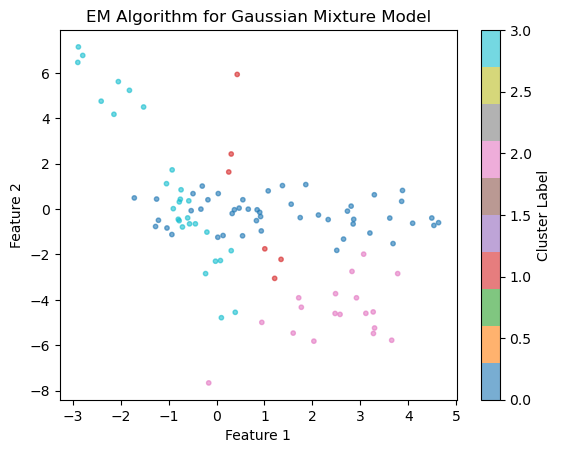

In [14]:
for _ in range(4000):
    responsibilities = expectation_step(X, k, means_hat, covariances_hat, pi_hat, responsibilities)
    means_hat, covariances_hat, pi_hat = maximization_step(X, k, responsibilities)
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(responsibilities, axis=1), cmap='tab10', alpha=0.6, s=10)
plt.title("EM Algorithm for Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [44]:
# Do Gibbs sampling here
k = 6
Z = np.random.choice(k, size=n)         # Cluster assignments
mu = np.random.randn(k, 2)              # Cluster means
alpha = np.random.choice(25, size=k)
pi = np.random.dirichlet(alpha)        # Cluster probabilities


In [45]:
for t in range(100):
    # Update Z
    for i in range(n):
        probs = np.array([pi[j] * multivariate_normal.pdf(X[i], mean=mu[j], cov=covariances[j]) for j in range(k)])
        probs /= probs.sum()
        Z[i] = np.random.choice(k, p=probs)
    # Update mu
    for i in range(k):
        cluster_points = X[Z == i]
        if len(cluster_points) > 0:
            mu[i] = np.random.multivariate_normal(np.mean(cluster_points, axis=0), np.eye(2))
    # Update pi
    pi = np.random.dirichlet(alpha + np.bincount(Z, minlength=k)) 

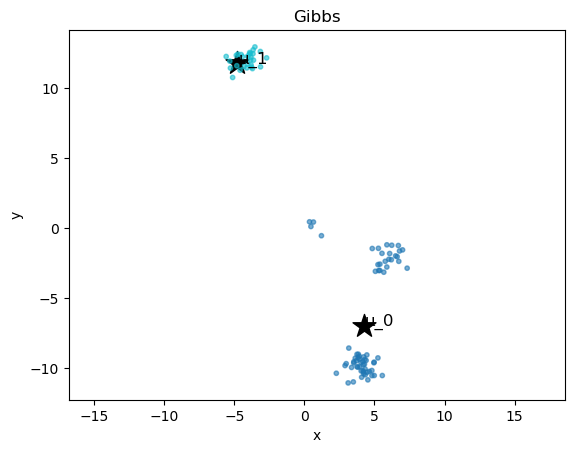

In [29]:
plt.scatter(mu[:, 0], mu[:, 1], marker='*', s=300, color='black')
plt.scatter(X[:, 0], X[:, 1], c=Z, cmap='tab10', alpha=0.6, s=10)
for i, center in enumerate(mu):
    plt.text(center[0] + 0.1, center[1], f"μ_{i}", fontsize=12)
plt.title("Gibbs")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


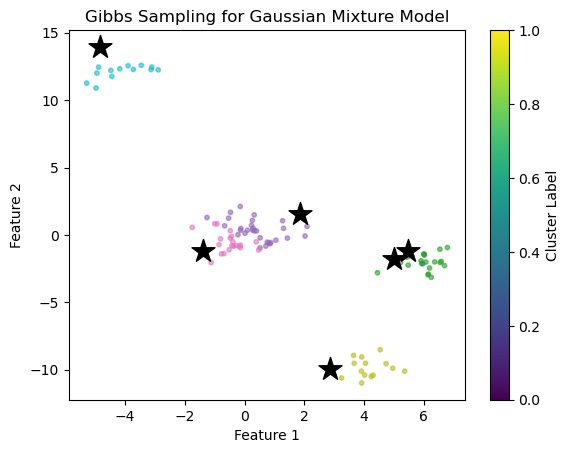

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=Z, cmap='tab10', alpha=0.6, s=10)
plt.scatter(mu[:, 0], mu[:, 1], marker='*', s=300, color='black')
plt.title("Gibbs Sampling for Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()